In [47]:
import string
import pandas as pd
import numpy as np
import seaborn as sns

from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalMaxPool1D, Dense
from tensorflow.keras.optimizers import Adam

In [19]:
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and",
             "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but",
             "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further",
             "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how", "hows", "i",
             "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself", "lets", "me", "more", "most",
             "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves",
             "out", "over", "own", "same", "she", "shed", "shell", "shes", "should", "so", "some", "such", "than",
             "that", "thats", "the", "their", "theirs", "them", "themselves", "then", "there", "theres", "these",
             "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through", "to", "too", "under", "until",
             "up", "very", "was", "we", "wed", "well", "were", "weve", "were", "what",
             "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why", "whys",
             "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself", "yourselves"]

table = str.maketrans('', '', string.punctuation)

In [13]:
datastore = pd.read_json('../../data/scarsam/Sarcasm_Headlines_Dataset.json', lines=True)
datastore

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [24]:
sentences = []
labels = []

for i in range(len(datastore)):
    sentence = datastore.loc[i, 'headline'].lower()
    sentence = sentence.replace(',', ' , ')
    sentence = sentence.replace('.', ' . ')
    sentence = sentence.replace('-', ' - ')
    sentence = sentence.replace('/', ' / ')

    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ''

    for word in words:
        word = word.translate(table)

        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + ' '

    sentences.append(filtered_sentence)
    labels.append(datastore.loc[i, 'is_sarcastic'])

In [34]:
training_size = 23000
vocab_size = 20000
vocab_length = 10
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<oov>'

training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[:training_size]
testing_labels = labels[training_size:]

In [35]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

training_padded = pad_sequences(training_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

word_index

{'<oov>': 1,
 'new': 2,
 'trump': 3,
 'man': 4,
 'not': 5,
 'just': 6,
 'will': 7,
 'one': 8,
 'year': 9,
 'report': 10,
 'area': 11,
 'donald': 12,
 'day': 13,
 'u': 14,
 's': 15,
 'can': 16,
 'says': 17,
 'woman': 18,
 'first': 19,
 'time': 20,
 'like': 21,
 'no': 22,
 'get': 23,
 'old': 24,
 'trumps': 25,
 'off': 26,
 'now': 27,
 'life': 28,
 'obama': 29,
 'people': 30,
 'house': 31,
 'women': 32,
 'white': 33,
 'back': 34,
 'still': 35,
 'make': 36,
 'clinton': 37,
 '5': 38,
 'world': 39,
 'americans': 40,
 'years': 41,
 'way': 42,
 'family': 43,
 'black': 44,
 'study': 45,
 'gop': 46,
 'best': 47,
 'bill': 48,
 'american': 49,
 'school': 50,
 'police': 51,
 'watch': 52,
 '3': 53,
 'show': 54,
 'really': 55,
 'president': 56,
 'home': 57,
 'last': 58,
 'video': 59,
 'finds': 60,
 'death': 61,
 'cant': 62,
 'know': 63,
 '10': 64,
 'things': 65,
 'good': 66,
 'going': 67,
 'state': 68,
 'hillary': 69,
 'love': 70,
 'nation': 71,
 'may': 72,
 '2': 73,
 'health': 74,
 'say': 75,
 'pare

In [37]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [46]:
model = Sequential(
    [Embedding(10000, 16),
     GlobalMaxPool1D(),
     Dense(units=24, activation='relu'),
     Dense(1, activation='sigmoid')]
)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

In [40]:
history = model.fit(x=training_padded,
                    y=training_labels,
                    validation_data=(testing_padded, testing_labels),
                    epochs=30)

Epoch 1/30
719/719 [==============================] - 6s 5ms/step - loss: 0.5746 - accuracy: 0.6903 - val_loss: 0.4643 - val_accuracy: 0.7760
Epoch 2/30
719/719 [==============================] - 6s 8ms/step - loss: 0.3449 - accuracy: 0.8537 - val_loss: 0.4415 - val_accuracy: 0.7894
Epoch 3/30
719/719 [==============================] - 6s 8ms/step - loss: 0.2285 - accuracy: 0.9098 - val_loss: 0.4834 - val_accuracy: 0.7924
Epoch 4/30
719/719 [==============================] - 6s 8ms/step - loss: 0.1561 - accuracy: 0.9417 - val_loss: 0.5496 - val_accuracy: 0.7857
Epoch 5/30
719/719 [==============================] - 6s 8ms/step - loss: 0.1061 - accuracy: 0.9639 - val_loss: 0.6333 - val_accuracy: 0.7789
Epoch 6/30
719/719 [==============================] - 6s 8ms/step - loss: 0.0708 - accuracy: 0.9759 - val_loss: 0.7335 - val_accuracy: 0.7792
Epoch 7/30
719/719 [==============================] - 6s 8ms/step - loss: 0.0472 - accuracy: 0.9856 - val_loss: 0.8366 - val_accuracy: 0.7724
Epoch 

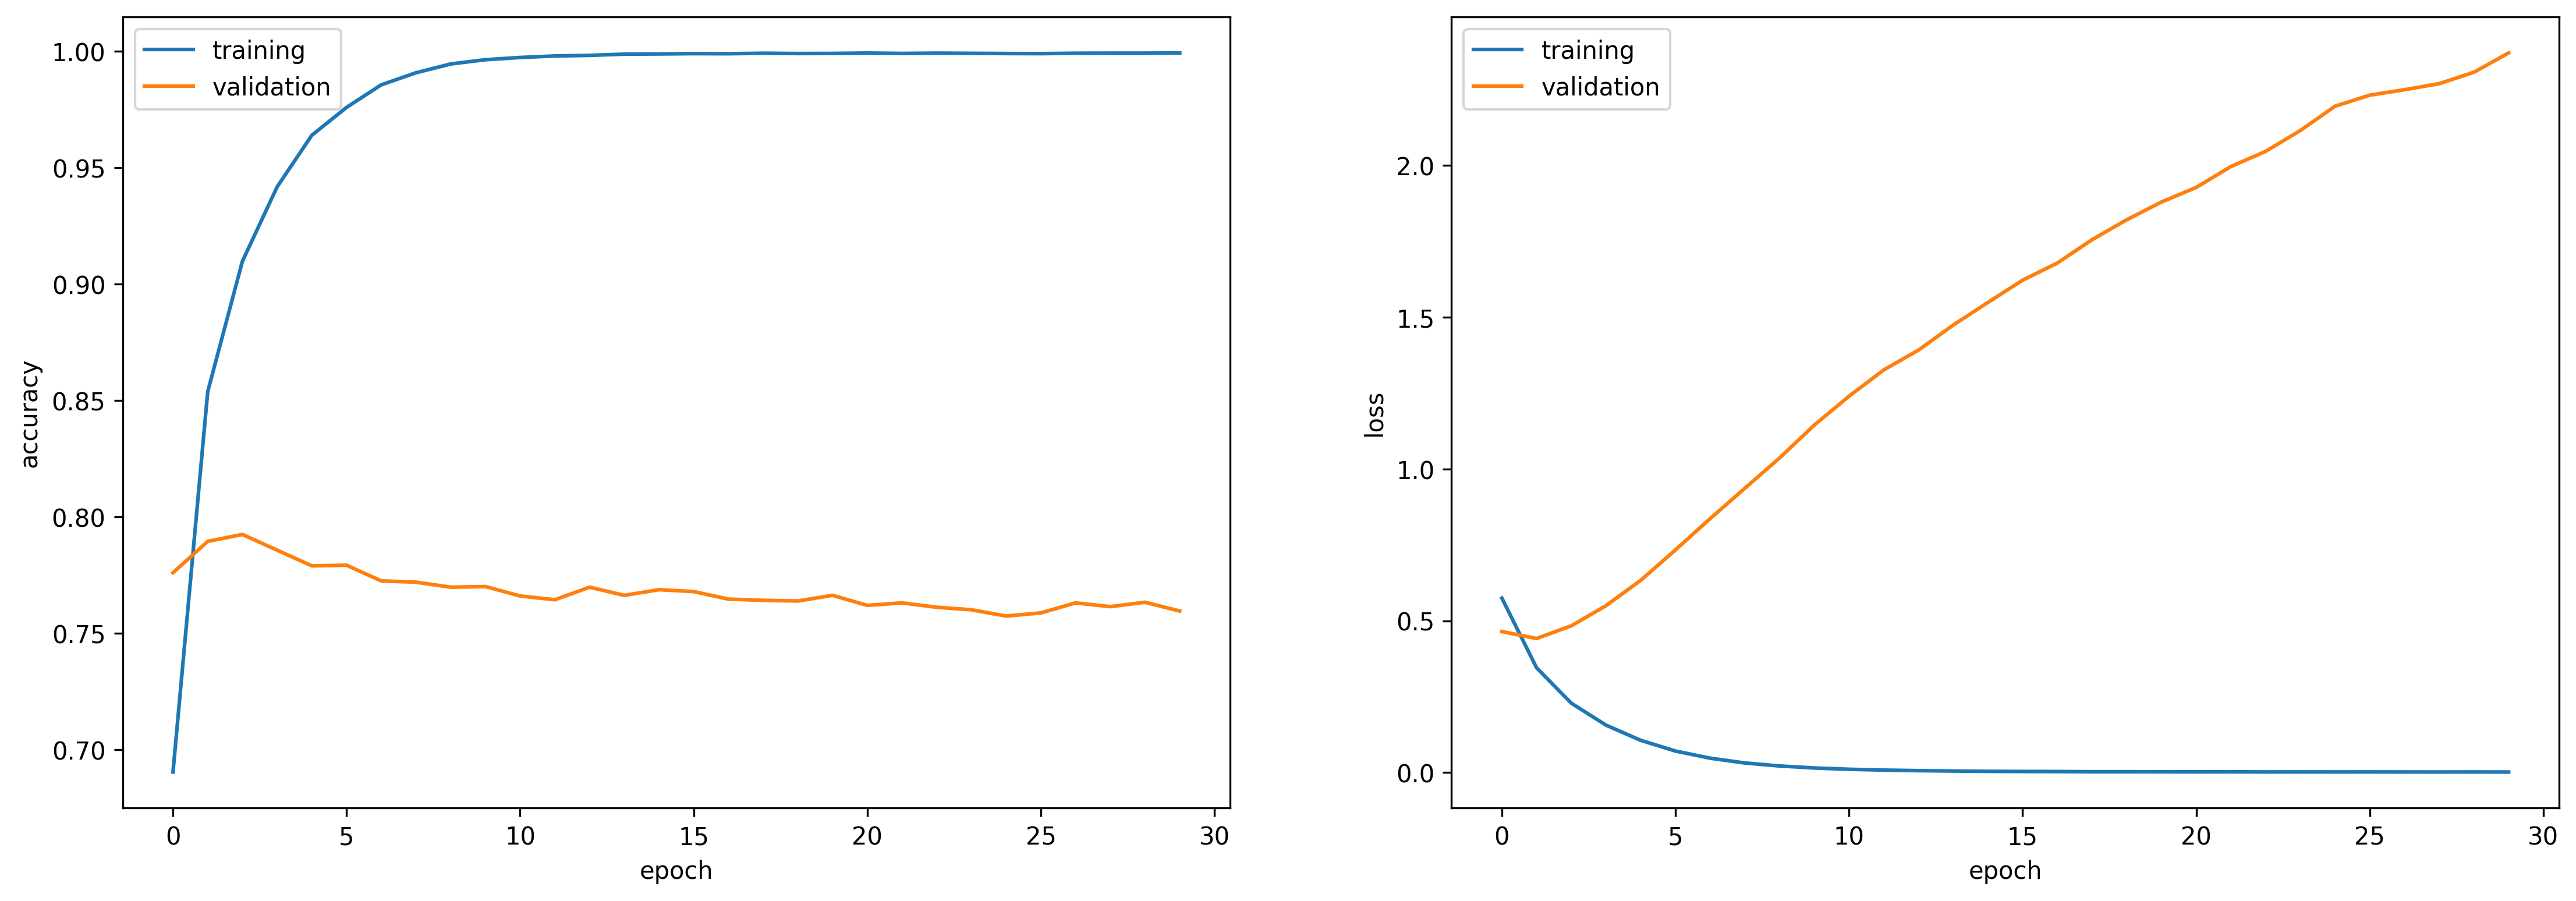

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[18, 6], dpi=300)
sns.lineplot(x=np.arange(30), y=history.history['accuracy'], ax=axes[0], label='training')
sns.lineplot(x=np.arange(30), y=history.history['val_accuracy'], ax=axes[0], label='validation')
sns.lineplot(x=np.arange(30), y=history.history['loss'], ax=axes[1], label='training')
sns.lineplot(x=np.arange(30), y=history.history['val_loss'], ax=axes[1], label='validation')

axes[0].set_xlabel('epoch')
axes[0].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('loss')

plt.show()

### resolve over-fitting

- adjusting the learning rate

In [48]:
adam = Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.999,amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(x=training_padded,
                    y=training_labels,
                    validation_data=(testing_padded, testing_labels),
                    epochs=30)

Epoch 1/30
719/719 [==============================] - 6s 8ms/step - loss: 0.6893 - accuracy: 0.5464 - val_loss: 0.6826 - val_accuracy: 0.5700
Epoch 2/30
719/719 [==============================] - 6s 9ms/step - loss: 0.6744 - accuracy: 0.5657 - val_loss: 0.6622 - val_accuracy: 0.5921
Epoch 3/30
719/719 [==============================] - 7s 9ms/step - loss: 0.6383 - accuracy: 0.6413 - val_loss: 0.6192 - val_accuracy: 0.6910
Epoch 4/30
719/719 [==============================] - 7s 10ms/step - loss: 0.5731 - accuracy: 0.7517 - val_loss: 0.5623 - val_accuracy: 0.7466
Epoch 5/30
719/719 [==============================] - 7s 9ms/step - loss: 0.5007 - accuracy: 0.8125 - val_loss: 0.5155 - val_accuracy: 0.7700
Epoch 6/30
719/719 [==============================] - 7s 9ms/step - loss: 0.4379 - accuracy: 0.8419 - val_loss: 0.4829 - val_accuracy: 0.7784
Epoch 7/30
719/719 [==============================] - 6s 9ms/step - loss: 0.3871 - accuracy: 0.8623 - val_loss: 0.4612 - val_accuracy: 0.7827
Epoch

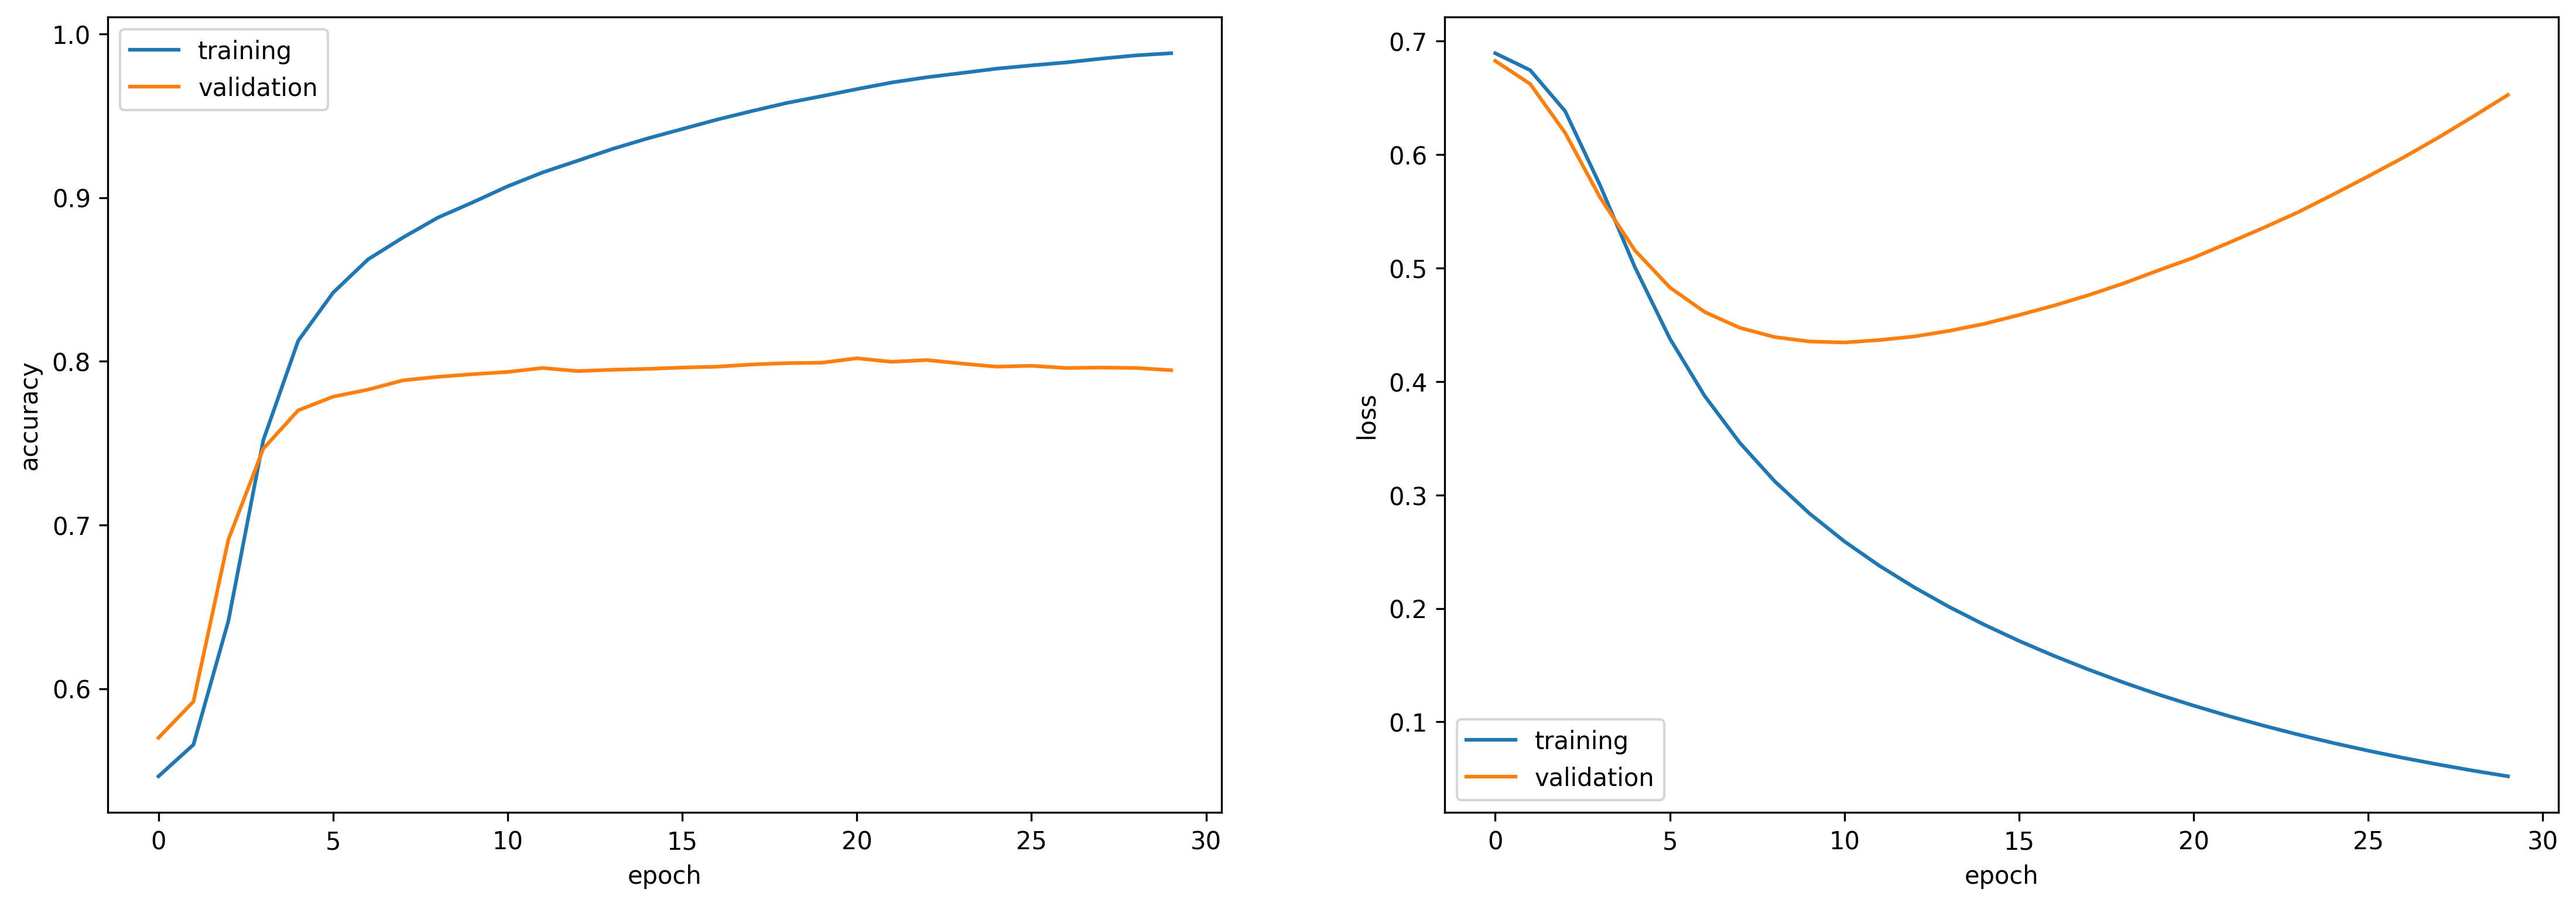

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[18, 6], dpi=300)
sns.lineplot(x=np.arange(30), y=history.history['accuracy'], ax=axes[0], label='training')
sns.lineplot(x=np.arange(30), y=history.history['val_accuracy'], ax=axes[0], label='validation')
sns.lineplot(x=np.arange(30), y=history.history['loss'], ax=axes[1], label='training')
sns.lineplot(x=np.arange(30), y=history.history['val_loss'], ax=axes[1], label='validation')

axes[0].set_xlabel('epoch')
axes[0].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('loss')

plt.show()